In [2]:
#linear task
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder


data=pd.read_csv('Data-Copy1.csv')
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [4]:
data['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

In [5]:
data.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
data.corr()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,1.000000,-0.056350,-0.041396,-0.042221,-0.069630,-0.048644,-0.099248,-0.061966,-0.050699,-0.037972,-0.084701
Clump Thickness,-0.056350,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Uniformity of Cell Size,-0.041396,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity of Cell Shape,-0.042221,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,-0.069630,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,-0.048644,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland Chromatin,-0.061966,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal Nucleoli,-0.050699,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,-0.037972,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448


In [7]:
X=data.iloc[:,1:10]
X.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [8]:
X= data[['Clump Thickness','Uniformity of Cell Size', 'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin', 'Normal Nucleoli', 'Mitoses']]
y=data['Class']

In [9]:
#y=data.iloc[:,-1]
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=1)
X_train.shape

(580, 9)

In [11]:
y_train.shape

(580,)

## LogisticRegression

In [12]:
lr= LogisticRegression(random_state=1,class_weight= 'balance')
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balance', random_state=1)

In [13]:
pred= lr.predict(X_test)

In [14]:
y_pred=lr.predict(X_test)

In [15]:
confusion_matrix(pred,y_test)

array([[66,  2],
       [ 0, 35]], dtype=int64)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.97      1.00      0.99        66
           4       1.00      0.95      0.97        37

    accuracy                           0.98       103
   macro avg       0.99      0.97      0.98       103
weighted avg       0.98      0.98      0.98       103



## RandomForest

In [17]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.15,random_state=1)
X_train.shape

(580, 9)

In [18]:
ran= RandomForestClassifier()
ran.fit(X_train1,y_train1)

RandomForestClassifier()

In [19]:
pred1= ran.predict(X_test1)

In [20]:
y_pred1=ran.predict(X_test1)

In [21]:
confusion_matrix(pred1,y_test1)

array([[66,  2],
       [ 0, 35]], dtype=int64)

In [22]:
ran.score(X_train1,y_train1)

1.0

In [23]:
ran.score(X_test1,y_test1)

0.9805825242718447

In [24]:
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           2       0.97      1.00      0.99        66
           4       1.00      0.95      0.97        37

    accuracy                           0.98       103
   macro avg       0.99      0.97      0.98       103
weighted avg       0.98      0.98      0.98       103



## Decision Tree

In [25]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.15,random_state=1)
X_train.shape

(580, 9)

de= DecisionTreeClassifier()
de.fit(X_train2,y_train2)

In [26]:
de= DecisionTreeClassifier()
de.fit(X_train2,y_train2)

DecisionTreeClassifier()

In [27]:
y_pred2=de.predict(X_test2)

In [28]:
h=confusion_matrix(y_pred2,y_test2)
h

array([[65,  9],
       [ 1, 28]], dtype=int64)

In [29]:
# sns.heatmap(h,annot=True)

In [30]:
de.score(X_test2,y_test2)

0.9029126213592233

In [31]:
de.score(X_train2,y_train2)

1.0

In [ ]:
print(classification_report(y_test2,y_pred2))

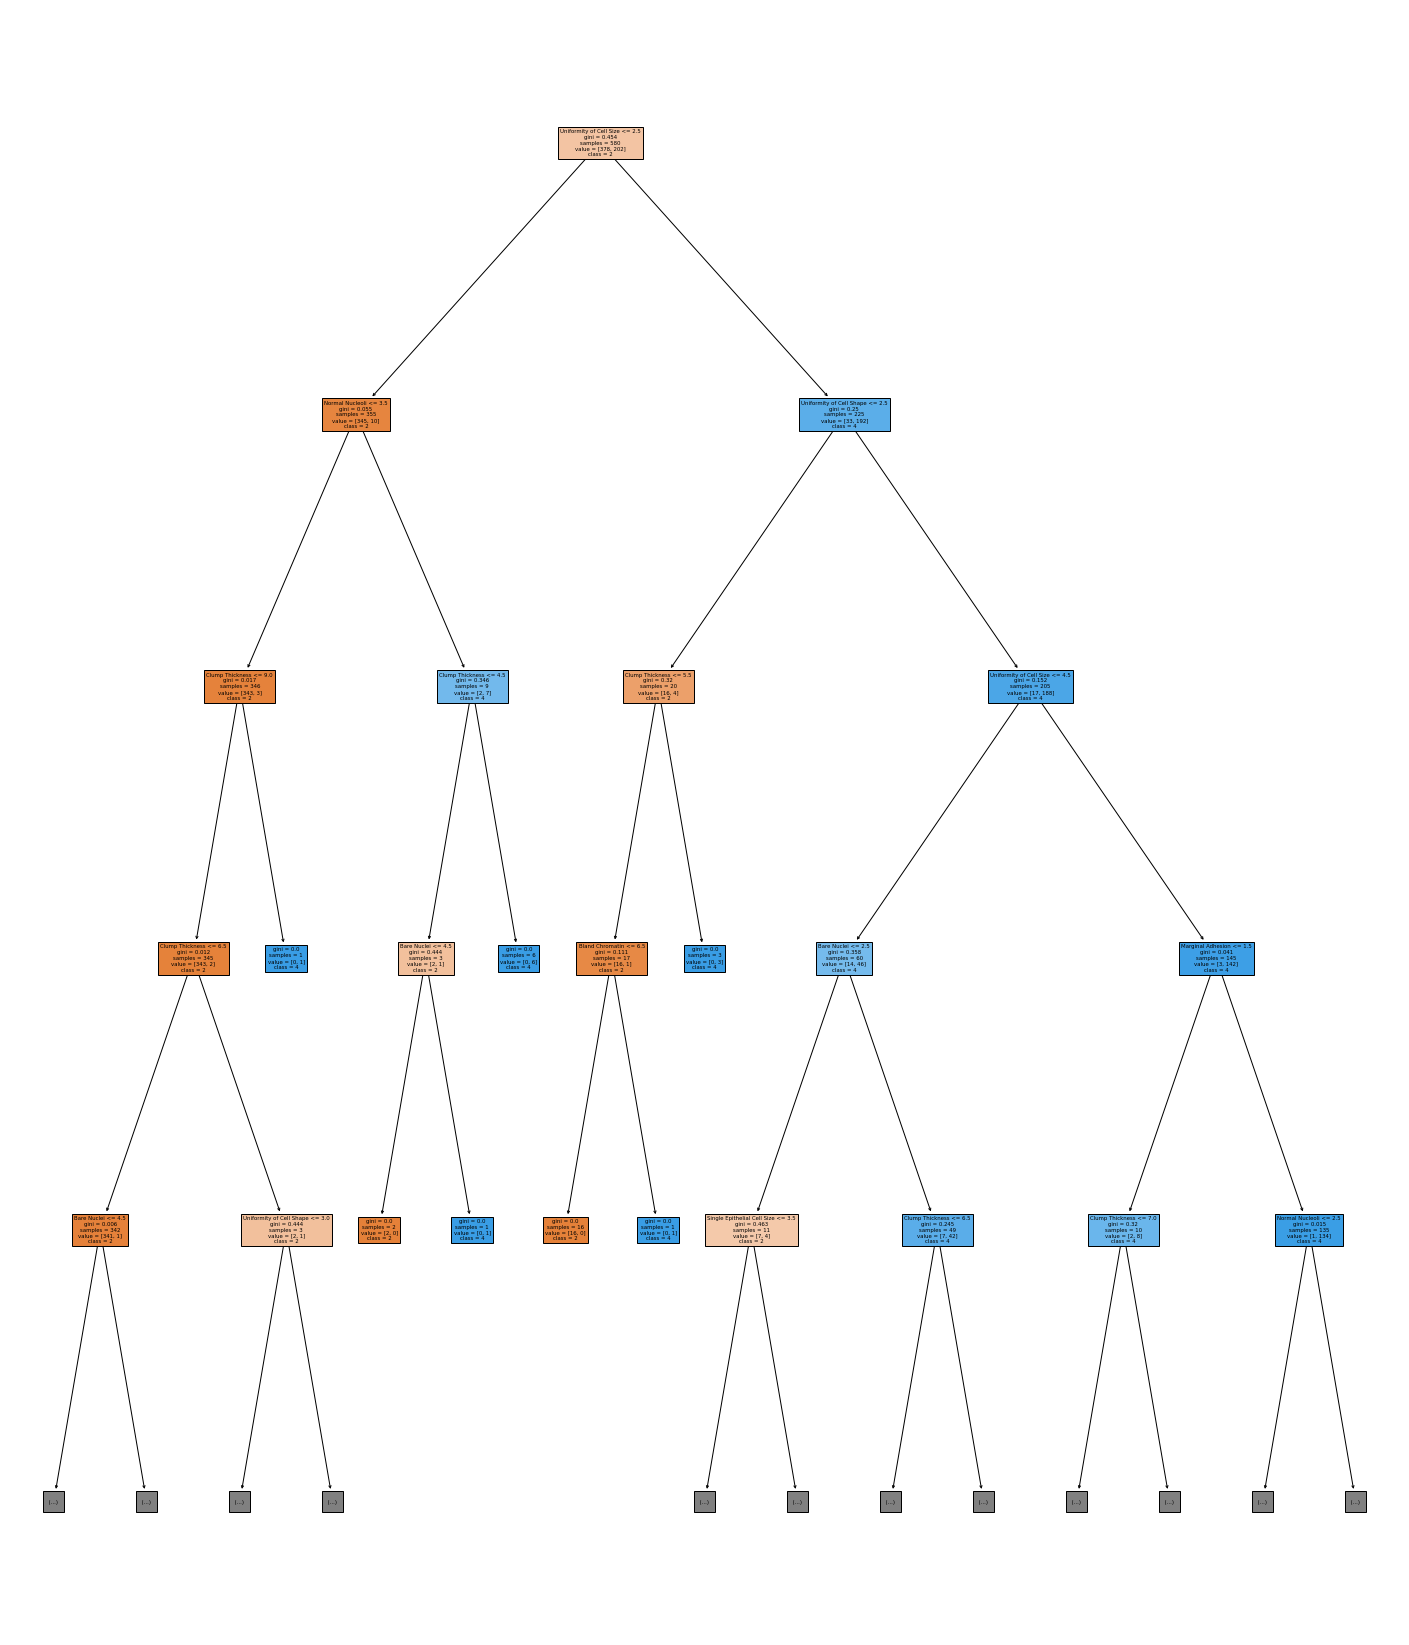

In [32]:
fig=plt.figure(figsize=(25,30))
_=plot_tree(de,feature_names=X.columns, class_names=['2','4'],filled=True,max_depth=4)               